# Importações

In [ ]:
!pip install -q kagglehub


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# Usar os nomes exatos dos arquivos reenviados

In [ ]:
import pandas as pd


train_df = pd.read_csv("Train_data.csv")
test_df = pd.read_csv("Test_data.csv")


In [ ]:
train_df.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal


In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
import os
os.listdir()


['.config', 'Train_data.csv', 'Test_data.csv', 'sample_data']

In [ ]:
train_path = "Train_data.csv"
test_path = "Test_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


Verificar se há valores nulos

In [ ]:

print("Valores nulos no conjunto de treino:")
print(train_df.isnull().sum())

print("\nValores nulos no conjunto de teste:")
print(test_df.isnull().sum())


Valores nulos no conjunto de treino:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_s

In [ ]:
print(f"\nTamanho do treino  {train_df.shape}")
print(f"Tamanho do teste  {test_df.shape}")


Tamanho do treino  (25192, 42)
Tamanho do teste  (22544, 41)


In [ ]:



categorical_cols = ['protocol_type', 'service', 'flag']
combined = pd.concat([train_df.drop(columns=['class']), test_df], axis=0)
combined_encoded = pd.get_dummies(combined, columns=categorical_cols)


train_encoded = combined_encoded.iloc[:len(train_df)]
test_encoded = combined_encoded.iloc[len(train_df):]


y = train_df['class'].map({'normal': 0, 'anomaly': 1})


X_train, X_test, y_train, y_test = train_test_split(train_encoded, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


modelos = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


resultados = []

for nome, modelo in modelos.items():
    print(f"\n===== {nome} =====")
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {acc:.4f}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    resultados.append({"Modelo": nome, "Acurácia": round(acc, 4)})


print("\n=== Comparativo de Acurácia ===")
df_resultados = pd.DataFrame(resultados).sort_values(by="Acurácia", ascending=False)
print(df_resultados)



===== Random Forest =====
Acurácia: 0.9972
Matriz de Confusão:
[[2669    5]
 [   9 2356]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2674
           1       1.00      1.00      1.00      2365

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039


===== Logistic Regression =====
Acurácia: 0.9756
Matriz de Confusão:
[[2621   53]
 [  70 2295]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2674
           1       0.98      0.97      0.97      2365

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039


===== KNN =====
Acurácia: 0.9936
Matriz de Confusão:
[[2660   14]
 [  18 2347]]
Relatório de Classifi

Acurácia: 0.9974
Matriz de Confusão:
[[2670    4]
 [   9 2356]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2674
           1       1.00      1.00      1.00      2365

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



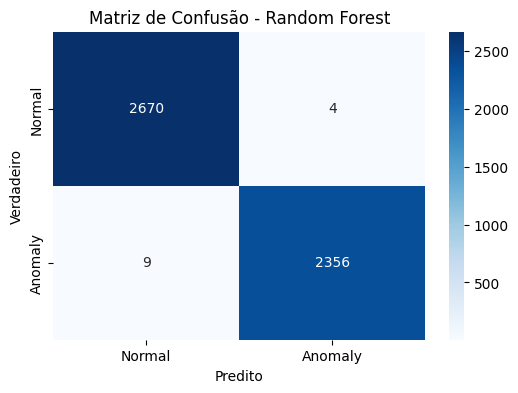

In [ ]:




categorical_cols = ['protocol_type', 'service', 'flag']
combined = pd.concat([train_df.drop(columns=['class']), test_df], axis=0)
combined_encoded = pd.get_dummies(combined, columns=categorical_cols)


train_encoded = combined_encoded.iloc[:len(train_df)]
test_encoded = combined_encoded.iloc[len(train_df):]


y = train_df['class'].map({'normal': 0, 'anomaly': 1})


X_train, X_test, y_train, y_test = train_test_split(train_encoded, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)

# 11. Visualização da Matriz de Confusão
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Matriz de Confusão - Random Forest')
plt.show()


# Probabilidades para a classe positiva
# Curva ROC

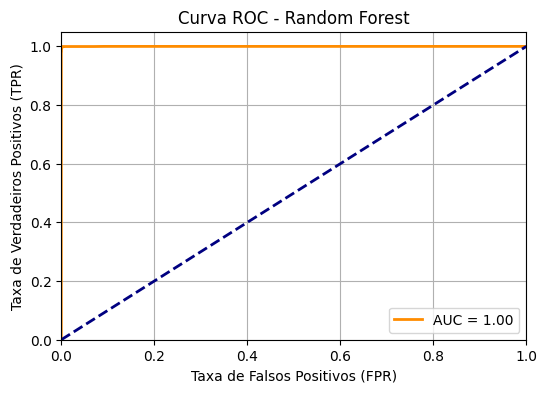

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Top 10 features Mais Importantes

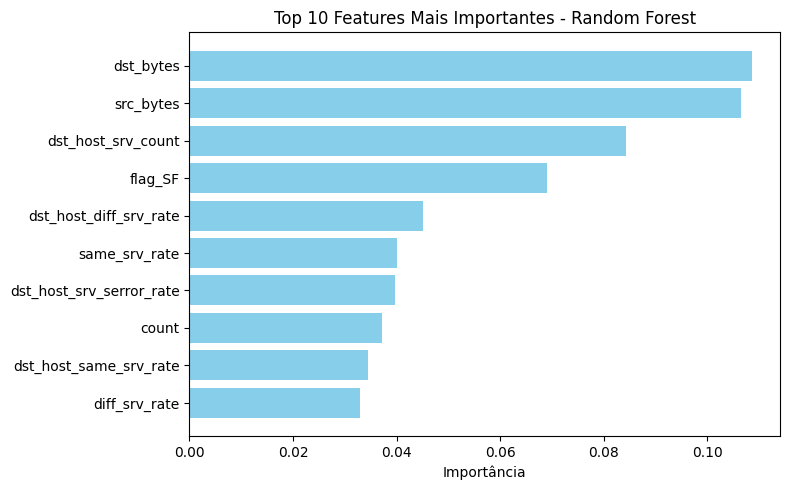

In [ ]:

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]
features = X_train.columns[indices]

# Plotar
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), features)
plt.xlabel('Importância')
plt.title('Top 10 Features Mais Importantes - Random Forest')
plt.tight_layout()
plt.show()
